Simultaneous loop

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]

for i, j in zip(x, y):
   print(str(i) + " / " + str(j))

1 / 4
2 / 5
3 / 6


Nested loop

In [ ]:
for i in x:
    for j in y:
        print(str(i) + " / " + str(j))

1 / 4
1 / 5
1 / 6
2 / 4
2 / 5
2 / 6
3 / 4
3 / 5
3 / 6


Add 2 vars with for loop using zip and range; Returning a list.

Note: Will only run till smallest range ends.

Source: https://stackoverflow.com/questions/18648626/for-loop-with-two-variables

In [ ]:
[g+h for g,h in zip(range(10), range(10))]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Enumerate

In [ ]:
elements = ('foo', 'bar', 'baz')
for count, elem in enumerate(elements):
  print(count, elem)

0 foo
1 bar
2 baz


Nested loop with Enumerate

In [ ]:
perplexities = [2, 5, 30, 50, 100]
iterations = [200, 500, 1000, 2000, 5000]

# print(perplexities)
# for i, perplexity in enumerate(perplexities):
#   print(i, perplexity)

In [ ]:
for i, perplexity in enumerate(perplexities):
  # if (i === 0):
  if i == 0:
    print('start of first loop')
  for j, iteration in enumerate(iterations):
    if j == 0:
      print('start of second loop')
    print(i, j, perplexity, iteration)


start of first loop
start of second loop
0 0 2 200
0 1 2 500
0 2 2 1000
0 3 2 2000
0 4 2 5000
start of second loop
1 0 5 200
1 1 5 500
1 2 5 1000
1 3 5 2000
1 4 5 5000
start of second loop
2 0 30 200
2 1 30 500
2 2 30 1000
2 3 30 2000
2 4 30 5000
start of second loop
3 0 50 200
3 1 50 500
3 2 50 1000
3 3 50 2000
3 4 50 5000
start of second loop
4 0 100 200
4 1 100 500
4 2 100 1000
4 3 100 2000
4 4 100 5000


How to Use t-SNE Effectively

Source: https://distill.pub/2016/misread-tsne/

circles, perplexity=5 in 1.1 sec
circles, perplexity=30 in 1.5 sec
circles, perplexity=50 in 1.9 sec
circles, perplexity=100 in 2.9 sec
S-curve, perplexity=5 in 1.1 sec
S-curve, perplexity=30 in 1.5 sec
S-curve, perplexity=50 in 1.4 sec
S-curve, perplexity=100 in 2 sec
uniform grid, perplexity=5 in 1 sec
uniform grid, perplexity=30 in 1.4 sec
uniform grid, perplexity=50 in 1.5 sec
uniform grid, perplexity=100 in 2 sec


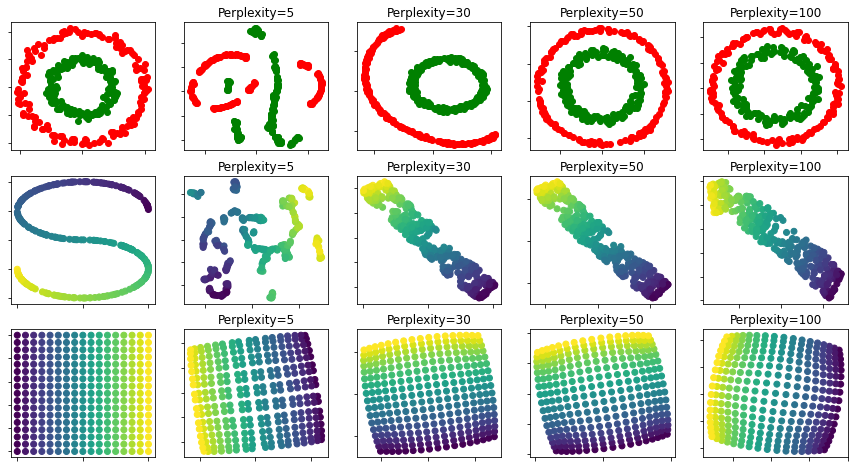

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()